In [134]:
from algbench import read_as_pandas, describe
from solver import Instance, Solution, Placement, plot_solution

# print full pandas dataframes
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

ARCHIVE = "./PRIVATE_DATA/results/"
from pathlib import Path
print(Path(ARCHIVE).exists())

describe(ARCHIVE)

True
An entry in the database can look like this:
_____________________________________________
 result:
| solution: placements=[Placement(x=142, y=50, rotated=False), Placement(x=0, y=0, rotate...
| status: 2
| upper_bound: 29.0
| objective_value: 28.0
 timestamp: 2024-02-08T14:42:52.474424
 runtime: 90.07661151885986
 stdout: []
 stderr: []
 logging: []
 env_fingerprint: 5319a1e25b32e62cd7fc6a45758c502faa9dba75
 args_fingerprint: 53799b3791acae3bace7a972e17f82cecde9de4d
 parameters:
| func: run_RectangleKnapsackWithoutRotationsModel
| args:
|| instance_name: hopper/N3d.json
|| time_limit: 90.0
|| opt_tol: 0.01
 argv: ['/ibr/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/slurmina...
 env:
| hostname: algra03
| python_version: 3.12.0 | packaged by Anaconda, Inc. | (main, Oct  2 2023, 17:29:18) [GCC 11.2.0]
| python: /ibr/home/krupke/anaconda3/envs/mo312/bin/python3
| cwd: /misc/ibr/home/krupke/cpsat-primer/evaluations/packing
| git_revision: 318e849b0f579f33123852f6ff6b9

In [135]:
def get_instance_size(instance):
    with open(f"./instances/{instance}") as f:
        return len(Instance.model_validate_json(f.read()).rectangles)
data = read_as_pandas("./PRIVATE_DATA/results",
                      lambda entry: {
                          "instance": entry["parameters"]["args"]["instance_name"],
                          "rotation": "WithRotation" in entry["parameters"]["func"],
                            "time": entry["runtime"],
                            "status": entry["result"]["status"],
                            "upper_bound": entry["result"]["upper_bound"],
                            "objective_value": entry["result"]["objective_value"],
                            "instance_size": get_instance_size(entry["parameters"]["args"]["instance_name"])

                      } if entry["parameters"]["func"] in ["run_RectangleKnapsackWithoutRotationsModel","run_RectangleKnapsackWithRotationsModel" ] else None
                      )
data.sort_values(by=["instance_size", "instance", "rotation"])

,instance,rotation,time,status,upper_bound,objective_value,instance_size
6,hopper/N1a.json,False,0.220977,4,17.0,17.0,17
7,hopper/N1a.json,True,0.691185,4,17.0,17.0,17
73,hopper/N1b.json,False,0.066548,4,17.0,17.0,17
74,hopper/N1b.json,True,0.195370,4,17.0,17.0,17
110,hopper/N1c.json,False,0.223273,4,17.0,17.0,17
9,hopper/N1c.json,True,0.878846,4,17.0,17.0,17
56,hopper/N1d.json,False,0.202984,4,17.0,17.0,17
57,hopper/N1d.json,True,0.390702,4,17.0,17.0,17
31,hopper/N1e.json,False,0.212213,4,17.0,17.0,17
32,hopper/N1e.json,True,1.687634,4,17.0,17.0,17


/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


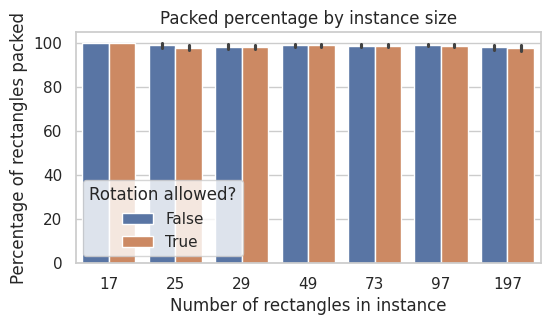

In [136]:
data["packed"] = 100*(data["objective_value"] / data["upper_bound"])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# boxplot with the packed percentage
plt.figure(figsize=(6, 3))
t = data.copy()
t.rename(columns={"rotation": "Rotation allowed?"}, inplace=True)
sns.barplot(x="instance_size", y="packed", hue="Rotation allowed?", data=t)

plt.ylabel("Percentage of rectangles packed")
plt.xlabel("Number of rectangles in instance")
plt.title("Packed percentage by instance size")

plt.show()

In [137]:
data = read_as_pandas("./PRIVATE_DATA/results",
                      lambda entry: {
                          "instance": entry["parameters"]["args"]["instance_name"],
                          "rotation": "WithRotation" in entry["parameters"]["func"],
                            "time": entry["runtime"],
                            "status": entry["result"]["status"],
                            "feasible": entry["result"]["feasible"],
                            "infeasible": entry["result"]["infeasible"],
                            "instance_size": get_instance_size(entry["parameters"]["args"]["instance_name"]),
                            "solution": entry["result"]["solution"] if entry["result"]["feasible"] else None

                      } if entry["parameters"]["func"] in ["run_RectanglePackingWithoutRotationsModel", "run_RectanglePackingWithRotationsModel"] else None
                      )
data["solved"] = data["feasible"] | data["infeasible"]
data.sort_values(by=["instance_size", "instance", "rotation"])

,instance,rotation,time,status,feasible,infeasible,instance_size,solution,solved
4,hopper/N1a.json,False,0.434990,4,True,False,17,"placements=[Placement(x=167, y=68, rotated=Fal...",True
5,hopper/N1a.json,True,9.059874,4,True,False,17,"placements=[Placement(x=0, y=0, rotated=True),...",True
72,hopper/N1b.json,False,0.113035,4,True,False,17,"placements=[Placement(x=63, y=0, rotated=False...",True
73,hopper/N1b.json,True,0.294792,4,True,False,17,"placements=[Placement(x=63, y=0, rotated=True)...",True
6,hopper/N1c.json,False,0.189408,4,True,False,17,"placements=[Placement(x=129, y=10, rotated=Fal...",True
7,hopper/N1c.json,True,1.535862,4,True,False,17,"placements=[Placement(x=104, y=0, rotated=True...",True
54,hopper/N1d.json,False,0.165486,4,True,False,17,"placements=[Placement(x=134, y=51, rotated=Fal...",True
55,hopper/N1d.json,True,7.532162,4,True,False,17,"placements=[Placement(x=0, y=0, rotated=True),...",True
30,hopper/N1e.json,False,1.425941,4,True,False,17,"placements=[Placement(x=179, y=44, rotated=Fal...",True
89,hopper/N1e.json,True,8.273266,4,True,False,17,"placements=[Placement(x=0, y=179, rotated=True...",True


In [138]:
data.groupby(["instance_size", "rotation"])[["solved"]].mean()

solved
instance_size rotation        
17            False        1.0
              True         1.0
25            False        0.7
              True         0.6
29            False        0.6
              True         0.5
49            False        0.5
              True         0.5
73            False        0.5
              True         0.5
97            False        0.5
              True         0.4
197           False        0.5
              True         0.0

/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


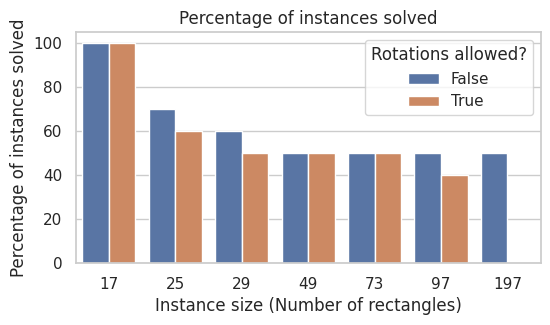

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 3))
t = data.groupby(["instance_size", "rotation"])[["solved"]].mean().copy()
t["solved"] = t["solved"] * 100
t = t.reset_index()
t.rename(columns={"rotation": "Rotations allowed?"}, inplace=True)
ax = sns.barplot(x="instance_size", y="solved", hue="Rotations allowed?", data=t)
ax.set_title("Percentage of instances solved")
ax.set_ylabel("Percentage of instances solved")
ax.set_xlabel("Instance size (Number of rectangles)")

plt.show()

/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


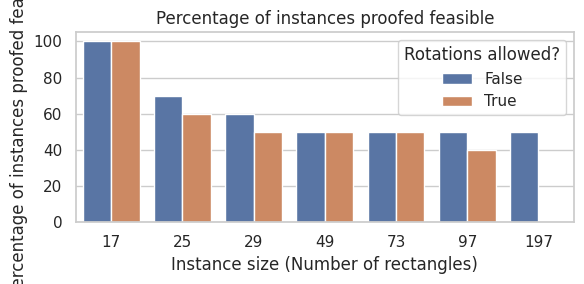

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 3))
t = data.groupby(["instance_size", "rotation"])[["feasible"]].mean().copy()
t["feasible"] = t["feasible"] * 100
t = t.reset_index()
t.rename(columns={"rotation": "Rotations allowed?"}, inplace=True)
ax = sns.barplot(x="instance_size", y="feasible", hue="Rotations allowed?", data=t)
ax.set_title("Percentage of instances proofed feasible")
ax.set_ylabel("Percentage of instances proofed feasible")
ax.set_xlabel("Instance size (Number of rectangles)")
plt.tight_layout()
plt.show()

/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


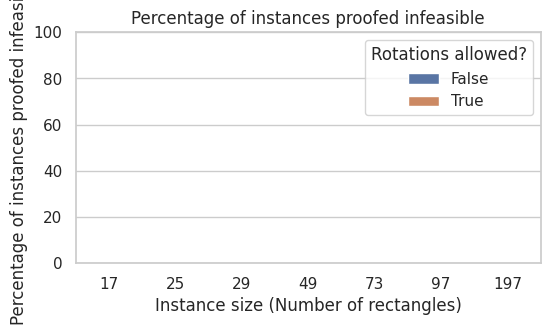

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 3))
t = data.groupby(["instance_size", "rotation"])[["infeasible"]].mean().copy()
t["infeasible"] = t["infeasible"] * 100
t = t.reset_index()
t.rename(columns={"rotation": "Rotations allowed?"}, inplace=True)
ax = sns.barplot(x="instance_size", y="infeasible", hue="Rotations allowed?", data=t)
ax.set_title("Percentage of instances proofed infeasible")
ax.set_ylabel("Percentage of instances proofed infeasible")
ax.set_xlabel("Instance size (Number of rectangles)")
ax.set_ylim(0, 100)
plt.show()

In [142]:
data.loc[(data["instance"]=="hopper/TN7e.json")&(data["rotation"]==False)].iloc[0]["solution"]

'placements=[Placement(x=0, y=0, rotated=False), Placement(x=0, y=17, rotated=False), Placement(x=0, y=38, rotated=False), Placement(x=0, y=74, rotated=False), Placement(x=0, y=98, rotated=False), Placement(x=0, y=103, rotated=False), Placement(x=0, y=123, rotated=False), Placement(x=0, y=158, rotated=False), Placement(x=8, y=38, rotated=False), Placement(x=8, y=49, rotated=False), Placement(x=9, y=74, rotated=False), Placement(x=9, y=84, rotated=False), Placement(x=15, y=158, rotated=False), Placement(x=15, y=160, rotated=False), Placement(x=15, y=182, rotated=False), Placement(x=19, y=17, rotated=False), Placement(x=19, y=123, rotated=False), Placement(x=19, y=182, rotated=False), Placement(x=19, y=185, rotated=False), Placement(x=20, y=103, rotated=False), Placement(x=20, y=113, rotated=False), Placement(x=24, y=98, rotated=False), Placement(x=27, y=160, rotated=False), Placement(x=28, y=84, rotated=False), Placement(x=32, y=123, rotated=False), Placement(x=32, y=134, rotated=False)

In [143]:
solution = Solution(placements=[Placement(x=0, y=0, rotated=False), Placement(x=0, y=17, rotated=False), Placement(x=0, y=38, rotated=False), Placement(x=0, y=74, rotated=False), Placement(x=0, y=98, rotated=False), Placement(x=0, y=103, rotated=False), Placement(x=0, y=123, rotated=False), Placement(x=0, y=158, rotated=False), Placement(x=8, y=38, rotated=False), Placement(x=8, y=49, rotated=False), Placement(x=9, y=74, rotated=False), Placement(x=9, y=84, rotated=False), Placement(x=15, y=158, rotated=False), Placement(x=15, y=160, rotated=False), Placement(x=15, y=182, rotated=False), Placement(x=19, y=17, rotated=False), Placement(x=19, y=123, rotated=False), Placement(x=19, y=182, rotated=False), Placement(x=19, y=185, rotated=False), Placement(x=20, y=103, rotated=False), Placement(x=20, y=113, rotated=False), Placement(x=24, y=98, rotated=False), Placement(x=27, y=160, rotated=False), Placement(x=28, y=84, rotated=False), Placement(x=32, y=123, rotated=False), Placement(x=32, y=134, rotated=False), Placement(x=32, y=150, rotated=False), Placement(x=32, y=156, rotated=False), Placement(x=32, y=196, rotated=False), Placement(x=34, y=17, rotated=False), Placement(x=34, y=23, rotated=False), Placement(x=34, y=36, rotated=False), Placement(x=34, y=47, rotated=False), Placement(x=34, y=62, rotated=False), Placement(x=36, y=36, rotated=False), Placement(x=36, y=44, rotated=False), Placement(x=39, y=23, rotated=False), Placement(x=39, y=28, rotated=False), Placement(x=39, y=44, rotated=False), Placement(x=39, y=51, rotated=False), Placement(x=40, y=74, rotated=False), Placement(x=40, y=92, rotated=False), Placement(x=40, y=134, rotated=False), Placement(x=40, y=140, rotated=False), Placement(x=42, y=156, rotated=False), Placement(x=42, y=175, rotated=False), Placement(x=45, y=44, rotated=False), Placement(x=45, y=46, rotated=False), Placement(x=48, y=17, rotated=False), Placement(x=50, y=46, rotated=False), Placement(x=51, y=175, rotated=False), Placement(x=52, y=92, rotated=False), Placement(x=52, y=95, rotated=False), Placement(x=52, y=106, rotated=False), Placement(x=54, y=140, rotated=False), Placement(x=57, y=0, rotated=False), Placement(x=57, y=30, rotated=False), Placement(x=57, y=156, rotated=False), Placement(x=57, y=187, rotated=False), Placement(x=57, y=194, rotated=False), Placement(x=58, y=36, rotated=False), Placement(x=58, y=51, rotated=False), Placement(x=59, y=95, rotated=False), Placement(x=59, y=104, rotated=False), Placement(x=61, y=187, rotated=False), Placement(x=61, y=192, rotated=False), Placement(x=62, y=92, rotated=False), Placement(x=65, y=134, rotated=False), Placement(x=67, y=0, rotated=False), Placement(x=67, y=6, rotated=False), Placement(x=69, y=74, rotated=False), Placement(x=70, y=192, rotated=False), Placement(x=73, y=6, rotated=False), Placement(x=73, y=14, rotated=False), Placement(x=76, y=51, rotated=False), Placement(x=76, y=60, rotated=False), Placement(x=82, y=74, rotated=False), Placement(x=82, y=138, rotated=False), Placement(x=82, y=152, rotated=False), Placement(x=82, y=160, rotated=False), Placement(x=82, y=164, rotated=False), Placement(x=82, y=182, rotated=False), Placement(x=86, y=164, rotated=False), Placement(x=86, y=169, rotated=False), Placement(x=90, y=6, rotated=False), Placement(x=90, y=8, rotated=False), Placement(x=90, y=10, rotated=False), Placement(x=92, y=152, rotated=False), Placement(x=92, y=155, rotated=False), Placement(x=92, y=160, rotated=False), Placement(x=94, y=60, rotated=False), Placement(x=94, y=72, rotated=False), Placement(x=94, y=155, rotated=False), Placement(x=95, y=10, rotated=False), Placement(x=96, y=51, rotated=False), Placement(x=96, y=66, rotated=False), Placement(x=99, y=6, rotated=False), Placement(x=99, y=7, rotated=False), Placement(x=99, y=152, rotated=False), Placement(x=99, y=155, rotated=False), Placement(x=101, y=7, rotated=False), Placement(x=101, y=66, rotated=False), Placement(x=101, y=67, rotated=False), Placement(x=102, y=51, rotated=False), Placement(x=105, y=0, rotated=False), Placement(x=105, y=73, rotated=False), Placement(x=105, y=84, rotated=False), Placement(x=105, y=88, rotated=False), Placement(x=105, y=95, rotated=False), Placement(x=105, y=101, rotated=False), Placement(x=105, y=107, rotated=False), Placement(x=105, y=123, rotated=False), Placement(x=105, y=133, rotated=False), Placement(x=113, y=133, rotated=False), Placement(x=113, y=136, rotated=False), Placement(x=114, y=123, rotated=False), Placement(x=115, y=101, rotated=False), Placement(x=115, y=102, rotated=False), Placement(x=116, y=107, rotated=False), Placement(x=116, y=111, rotated=False), Placement(x=116, y=121, rotated=False), Placement(x=118, y=111, rotated=False), Placement(x=118, y=116, rotated=False), Placement(x=119, y=138, rotated=False), Placement(x=120, y=0, rotated=False), Placement(x=120, y=12, rotated=False), Placement(x=120, y=55, rotated=False), Placement(x=120, y=84, rotated=False), Placement(x=120, y=86, rotated=False), Placement(x=120, y=95, rotated=False), Placement(x=124, y=107, rotated=False), Placement(x=124, y=113, rotated=False), Placement(x=125, y=107, rotated=False), Placement(x=125, y=109, rotated=False), Placement(x=125, y=121, rotated=False), Placement(x=126, y=138, rotated=False), Placement(x=126, y=155, rotated=False), Placement(x=126, y=158, rotated=False), Placement(x=126, y=164, rotated=False), Placement(x=127, y=12, rotated=False), Placement(x=127, y=43, rotated=False), Placement(x=129, y=86, rotated=False), Placement(x=129, y=109, rotated=False), Placement(x=130, y=138, rotated=False), Placement(x=130, y=146, rotated=False), Placement(x=131, y=95, rotated=False), Placement(x=131, y=103, rotated=False), Placement(x=132, y=55, rotated=False), Placement(x=132, y=60, rotated=False), Placement(x=133, y=84, rotated=False), Placement(x=133, y=97, rotated=False), Placement(x=133, y=107, rotated=False), Placement(x=133, y=127, rotated=False), Placement(x=133, y=134, rotated=False), Placement(x=135, y=84, rotated=False), Placement(x=135, y=92, rotated=False), Placement(x=136, y=0, rotated=False), Placement(x=137, y=55, rotated=False), Placement(x=137, y=58, rotated=False), Placement(x=137, y=92, rotated=False), Placement(x=137, y=146, rotated=False), Placement(x=139, y=58, rotated=False), Placement(x=143, y=0, rotated=False), Placement(x=143, y=22, rotated=False), Placement(x=143, y=34, rotated=False), Placement(x=143, y=50, rotated=False), Placement(x=148, y=138, rotated=False), Placement(x=148, y=152, rotated=False), Placement(x=148, y=155, rotated=False), Placement(x=149, y=84, rotated=False), Placement(x=150, y=127, rotated=False), Placement(x=150, y=131, rotated=False), Placement(x=151, y=131, rotated=False), Placement(x=156, y=34, rotated=False), Placement(x=156, y=43, rotated=False), Placement(x=156, y=50, rotated=False), Placement(x=156, y=58, rotated=False), Placement(x=156, y=152, rotated=False), Placement(x=156, y=154, rotated=False), Placement(x=161, y=154, rotated=False), Placement(x=167, y=152, rotated=False), Placement(x=172, y=58, rotated=False), Placement(x=172, y=73, rotated=False), Placement(x=172, y=130, rotated=False), Placement(x=175, y=0, rotated=False), Placement(x=175, y=14, rotated=False), Placement(x=182, y=73, rotated=False), Placement(x=182, y=120, rotated=False), Placement(x=184, y=164, rotated=False), Placement(x=184, y=179, rotated=False), Placement(x=185, y=120, rotated=False), Placement(x=186, y=22, rotated=False), Placement(x=189, y=179, rotated=False), Placement(x=189, y=184, rotated=False), Placement(x=191, y=164, rotated=False), Placement(x=193, y=50, rotated=False), Placement(x=194, y=14, rotated=False)])

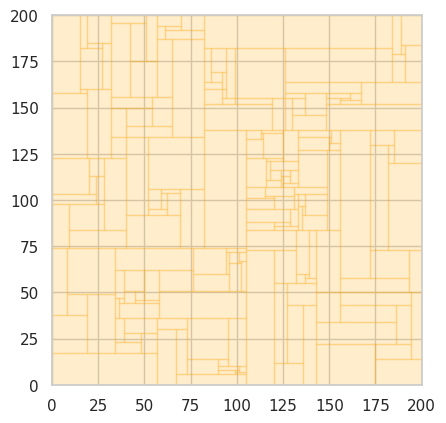

In [144]:
instance = Instance.model_validate_json(open("./instances/hopper/TN7e.json").read())

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_solution(ax, instance, solution)
plt.show()